In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Import Data

In [12]:
train_df = pd.read_csv("trainhouseprices.csv")
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [ ]:
# Summary statistics for SalePrice
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The 'SalePrice' description indicates right-skewness in the data, with the mean 'SalePrice' of $180,921 exceeding the median of $163,000.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

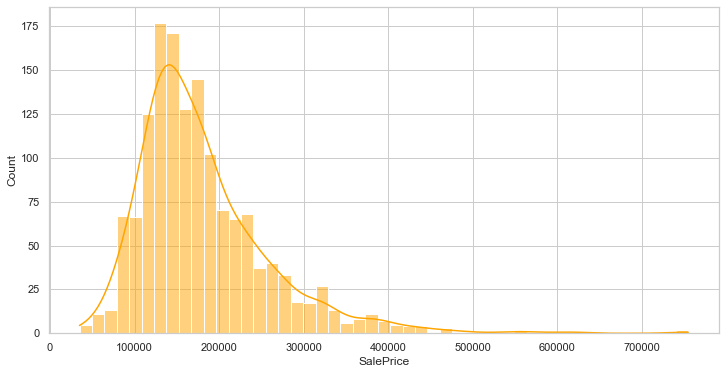

In [ ]:
# Histogram of SalePrice
plt.figure(figsize = (12,6))
sns.histplot(data=train_df, kde=True, x='SalePrice', color="orange")

<AxesSubplot:xlabel='SalePrice'>

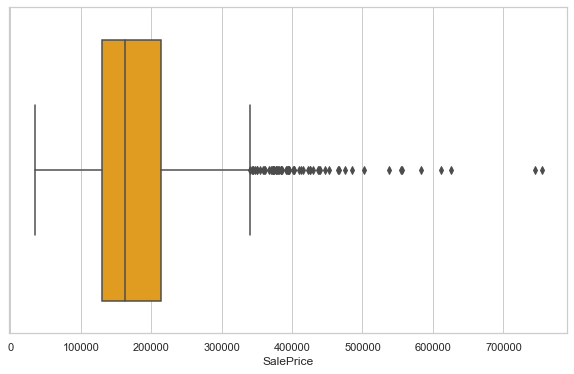

In [ ]:
# Boxplot of SalePrice
plt.figure(figsize = (10,6))
sns.boxplot(x=train_df["SalePrice"], color = "orange")

There appear to be a significant amount of outliers on the upper end of SalePrice, which is not unexpected with a right skew

# 2. Investigate missing data and outliers.

## 2.1 Missing Data

In [23]:
# Examine missing values in our data by column
mv_count = train_df.isnull().sum()
mv_percentage = (train_df.isnull().sum() * 100 / len(train_df)).round(2)
column_type = train_df.dtypes

mv_summary = pd.DataFrame({
    'Missing Count': null_count,
    'Percentage Missing': null_percentage,
    'Column Type': column_type
})

mv_summary_ascending = null_summary[null_count > 0].sort_values('Percentage Missing', ascending=False)

print("Summary of Missing Values:")
print(mv_summary_ascending)


Summary of Missing Values:
              Missing Count  Percentage Missing Column Type
PoolQC                 1453               99.52      object
MiscFeature            1406               96.30      object
Alley                  1369               93.77      object
Fence                  1179               80.75      object
FireplaceQu             690               47.26      object
LotFrontage             259               17.74     float64
GarageType               81                5.55      object
GarageYrBlt              81                5.55     float64
GarageFinish             81                5.55      object
GarageQual               81                5.55      object
GarageCond               81                5.55      object
BsmtExposure             38                2.60      object
BsmtFinType2             38                2.60      object
BsmtFinType1             37                2.53      object
BsmtCond                 37                2.53      object
BsmtQual     

The data dictionary indicates that a majority of the fields instead of signifying values, instead have NA assigned to them, which indicates "No Feature." Thus we should not fill missing values in columns with NA designation. Nor should we delete these columns as they are still pertinent information simply requiring transformation. 

In [147]:
na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
train_df[na_columns] = train_df[na_columns].fillna('None')


In [149]:
null_count = train_df.isnull().sum()
null_percentage = (train_df.isnull().sum() * 100 / len(train_df)).round(2)
column_type = train_df.dtypes

null_summary = pd.DataFrame({
    'Missing Count': null_count,
    'Percentage Missing': null_percentage,
    'Column Type': column_type
})

null_summary_only_missing = null_summary[null_count > 0].sort_values('Percentage Missing', ascending=False)
print("Updated Summary of Missing Values:")
print(null_summary_only_missing)


Updated Summary of Missing Values:
            Missing Count  Percentage Missing Column Type
MasVnrArea              8                0.55     float64
Electrical              1                0.07      object


'LotFrontage', 'MasVnrArea', 'Electrical': data dictionary lists no reasons why these columns would have missing values. We will fill 'LotFrontage' based on 'Neighborhood' median, the rest lack significance (sub 1%missing values). 'GarageYrBlt': no data disctionary indication for null values, will fill based on house year built ('YearBuilt')

In [150]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train_df['GarageYrBlt'].fillna(train_df['YearBuilt'], inplace=True)

In [151]:
#Determine if there are any duplicates
train_df.duplicated().sum()

0

## 2.2 Examining Outliers

We will only examine extreme outliers that coincide with 3*IQR above/below the first and third quartiles

In [55]:
num_df = train_df.select_dtypes(include=np.number)

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)

IQR = Q3 - Q1

outlier1 = ((num_df < (Q1 - 3 * IQR)) | (num_df > (Q3 + 3 * IQR))).sum()
outlier2 = outlier1[outlier1 > 0]
outlier2.sort_values(ascending=False)


EnclosedPorch    208
BsmtFinSF2       167
ScreenPorch      116
BsmtHalfBath      82
KitchenAbvGr      68
MiscVal           52
LotArea           34
LowQualFinSF      26
MasVnrArea        25
3SsnPorch         24
OpenPorchSF       18
LotFrontage       13
SalePrice         12
PoolArea           7
TotalBsmtSF        5
GrLivArea          4
GarageArea         3
WoodDeckSF         3
1stFlrSF           3
TotRmsAbvGrd       1
BsmtFinSF1         1
OverallCond        1
BedroomAbvGr       1
dtype: int64

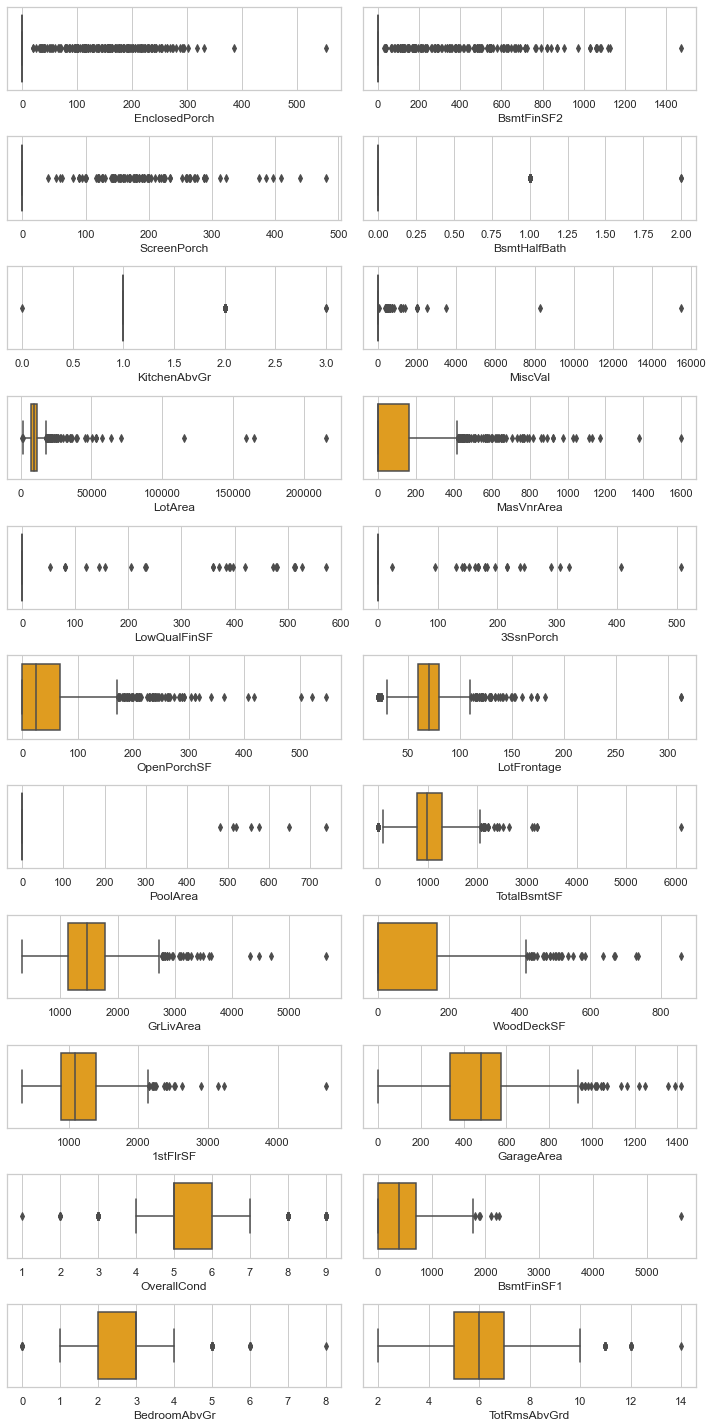

In [71]:
outlier3 = ['EnclosedPorch', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'KitchenAbvGr', 'MiscVal',
            'LotArea', 'MasVnrArea', 'LowQualFinSF', '3SsnPorch', 'OpenPorchSF', 'LotFrontage', 'PoolArea', 'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', '1stFlrSF', 
            'GarageArea', 'OverallCond', 'BsmtFinSF1', 'BedroomAbvGr', 'TotRmsAbvGrd']

fig, ax = plt.subplots(11, 2, figsize = (10, 20))

for var, subplot in zip(outlier3, ax.flatten()):
    sns.boxplot(x=train_df[var], ax = subplot, color = 'orange')
    
fig.tight_layout()


Based on the boxplots there is evidence for extreme outliers. However, it would be useful to examine these more closely relative to our dependent variable. And  outliers based on IQRx3 may still have strong correlation to our dependent variable.

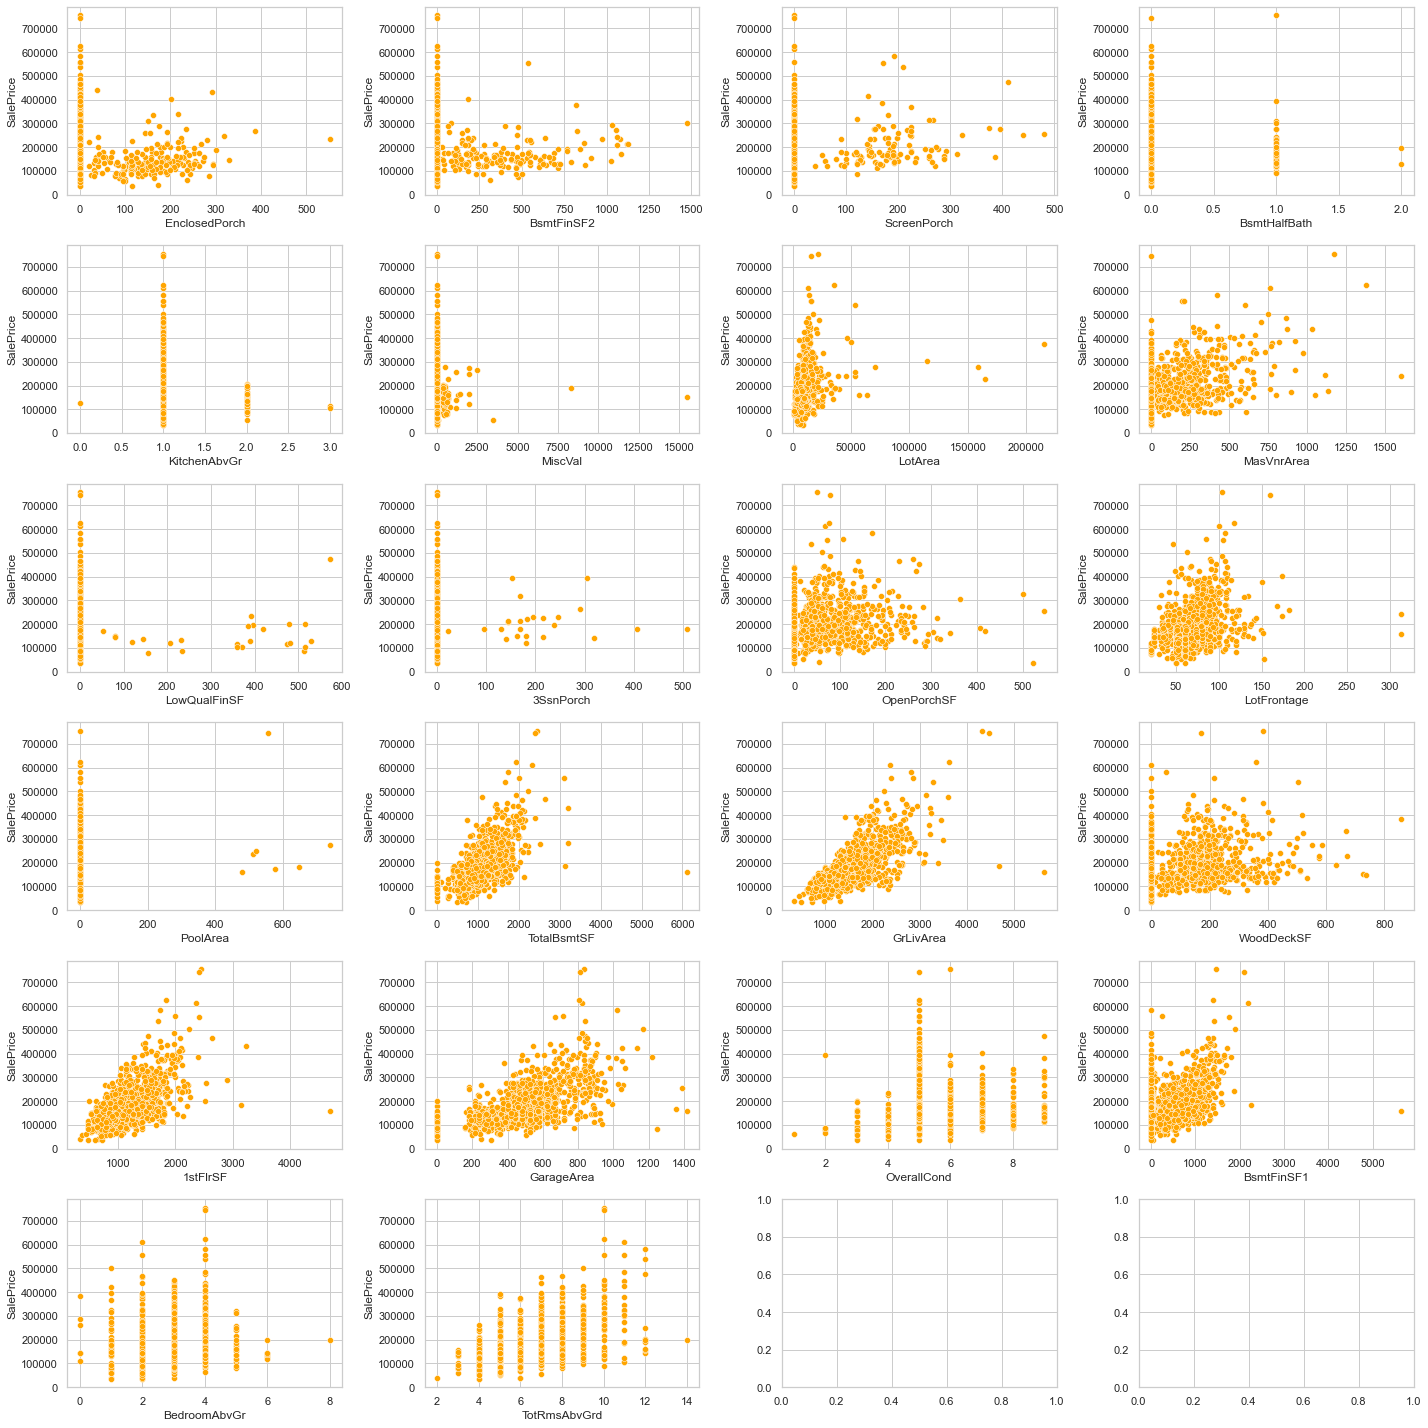

In [74]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i in range(6):
    for j in range(4):
        n = 4 * i + j
        
        if n < len(outlier3):
            sns.scatterplot(x=outlier3[n], y='SalePrice', data=train_df, ax=axs[i, j], color = 'orange')

fig.tight_layout()
plt.show()


After reviewing the plots, we can see that some outliers are more significant than others. A few such cases are: 
- 'LotFrontage'
- 'TotalBsmtSF' & 'BsmtFinSF1' (These are likely the same datapoints)
- 'GrLivArea' (only looking at the values corresponding to GrLivArea > 4000 & SalePrice < 200000)

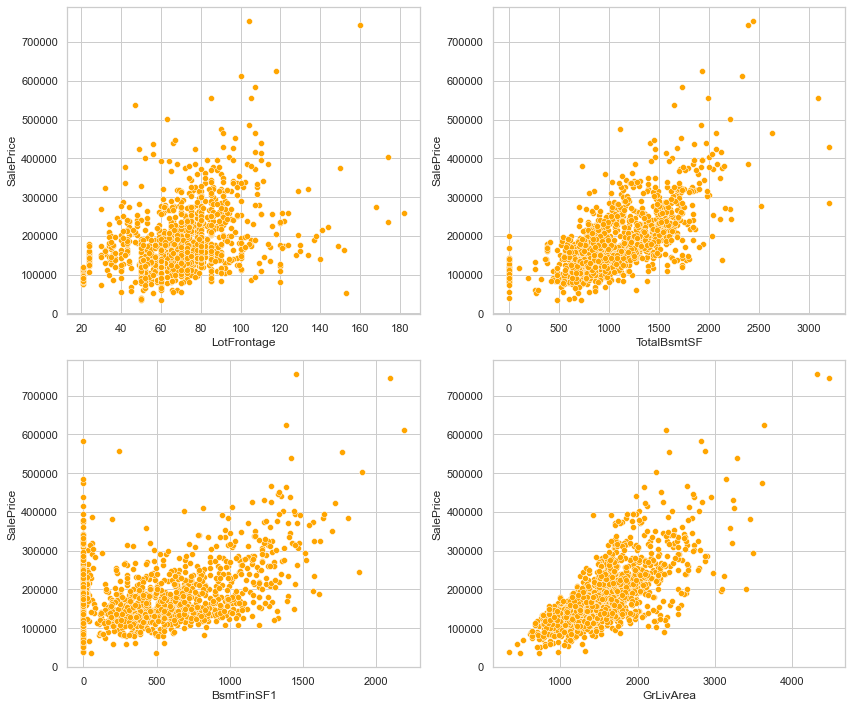

In [144]:
# Extreme outliers from the aforementioned variables will be dropped
train_df = train_df.drop(train_df[train_df['LotFrontage'] > 200].index)

train_df = train_df.drop(train_df[train_df['TotalBsmtSF'] > 4000].index)

train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 200000)].index)

# Plot the variables that were dropped
outlier4 = ['LotFrontage', 'TotalBsmtSF',  'BsmtFinSF1', 'GrLivArea']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(2):
    for j in range(2):
        n = 2 * i + j
        
        if n < len(outlier4):
            sns.scatterplot(x=outlier4[n], y='SalePrice', data=train_df, ax=axs[i, j], color = 'orange')

fig.tight_layout()
plt.show()

# 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

I will check correlation using a corelation heatmap to view potential predictor variables with our dependent variable (SalePrice)

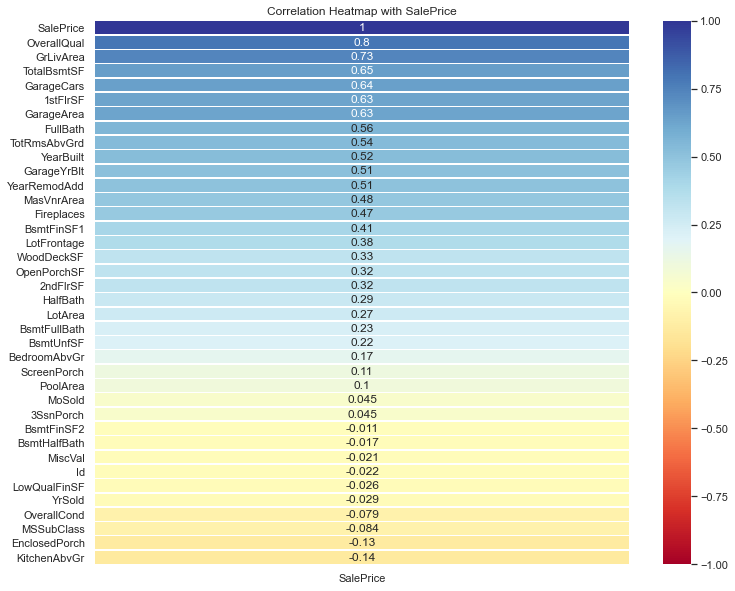

In [78]:
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True,
            cmap='RdYlBu',
            linewidths=0.5,
            vmin=-1, vmax=1,
            cbar=True)
plt.title('Correlation Heatmap with SalePrice')
plt.show()

In [134]:
corr_matrix = train_df.corr()
cor_target = abs(corr_matrix['SalePrice'])

relevant_features = cor_target[cor_target > 0.5]
relevant_features_sorted = relevant_features.sort_values(ascending=False)

print("Descending List of Highly Correlated Features:")
print(relevant_features_sorted)


Descending List of Highly Correlated Features:


The 5 highest correlated variables are:

- OverallQual:   0.795707
- GrLivArea:     0.734842
- TotalBsmtSF:   0.652164
- GarageCars:    0.641033
- 1stFlrSF:      0.631667




### Predictor 1: OverallQual

'OverallQual' is a categorical variable that represents the overall quality of houses on a scale from 1 to 10. It is the top predictor of 'SalePrice', showing a strong positive qualitative correlation. In other words, as 'OverallQual' increases, 'SalePrice' tends to increase as well, indicating that the quality of a house is an important factor in determining its sale price.

Text(0.5, 1.0, 'Box Plot of SalePrice by OverallQual')

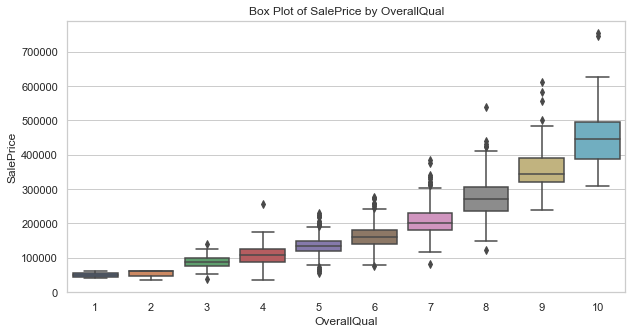

In [88]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.boxplot(data=train_df, x='OverallQual', y='SalePrice', ax=axs)
axs.set_title('Box Plot of SalePrice by OverallQual')

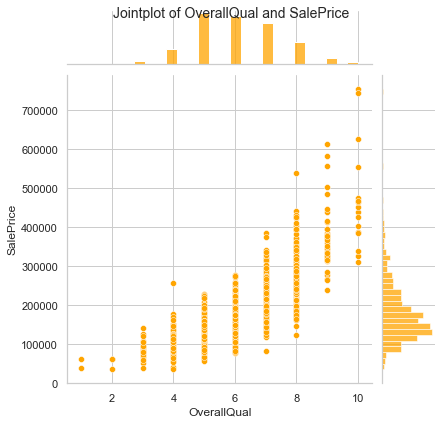

In [161]:
plot = sns.jointplot(x="OverallQual", y="SalePrice", data=train_df, color='orange')
plot.fig.suptitle("Jointplot of OverallQual and SalePrice", fontsize=14)
plt.show()

### Predictor 2: GrLivArea

'GrLivArea' exhibits a substantial positive correlation with 'SalePrice.' This variable represents the total livable square footage above ground in houses. The correlation indicates that as the livable square footage increases, the 'SalePrice' is expected to increase as well. In other words, a larger aboveground living area tends to be associated with a higher sale price for houses.

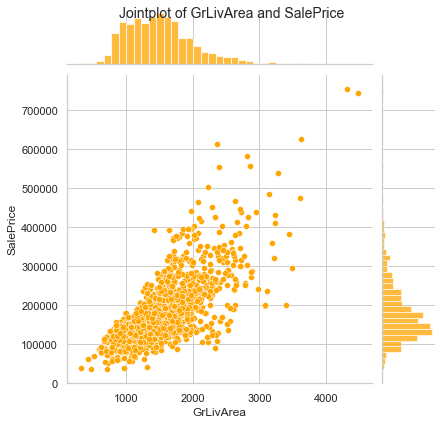

In [95]:
plot = sns.jointplot(x="GrLivArea", y="SalePrice", data=train_df, color='orange')
plot.fig.suptitle("Jointplot of GrLivArea and SalePrice", fontsize=14)
plt.show()

### Predictor 1 & 2

I want to focus on a specific comparison between two key variables, 'OverallQual' and 'GrLivArea,' concerning their relationship with the dependent variable, 'SalePrice.'

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

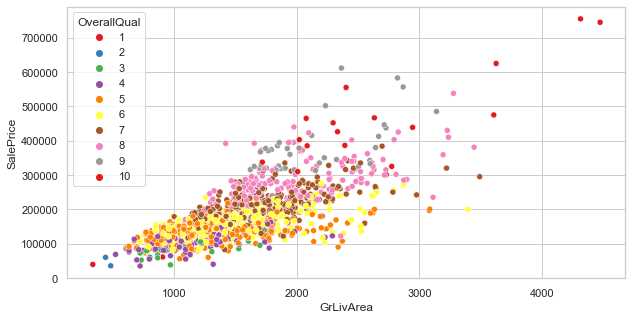

In [110]:
fig, axs = plt.subplots(figsize=(10, 5))
palette_name = 'Set1'  
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'], hue=train_df['OverallQual'], palette=palette_name, ax=axs)




In the presented plot, each rating of 'OverallQual' (ranging from 1 to 10) is visually distinguished by a different color. The plot reveals distinct tiers based on 'OverallQual,' spanning a wide range of 'GrLivArea' values (total living square footage above ground). When examining each color individually, corresponding to different 'OverallQual' values, most of them display positive slopes. These positive slopes are primarily attributed to increases in living square footage, which drive up 'SalePrice' within the same 'OverallQual' rating. This observation aligns with the known correlation between these two variables and 'SalePrice,' with the distinct color tiers indicating that 'OverallQual' has a stronger influence on 'SalePrice' compared to 'GrLivArea.'

## Catagorical Predictor

### Predictor 3: Neighborhood

Among the categorical variables in the dataset, 'Neighborhood' stands out as having a significant distribution across various categories. This suggests that there is a diverse range of neighborhoods represented in the data. Given the common understanding that neighborhoods often have a substantial impact on house prices, the objective is to investigate whether 'Neighborhood' serves as a predictor for 'SalePrice.' Specifically, the goal is to determine if there are meaningful differences in 'SalePrice' based on the different 'Neighborhood' categories. This analysis aims to assess the influence of neighborhood location on housing prices in the dataset.

In [117]:
neighbor_counts = train_df['Neighborhood'].value_counts()
print(neighbor_counts)

NAmes      224
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


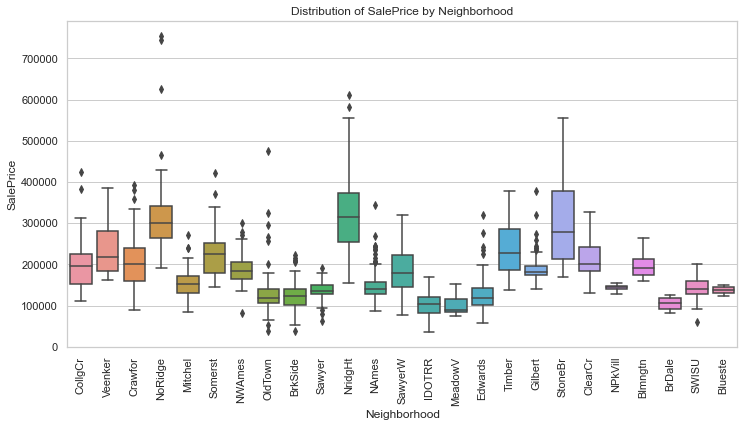

In [118]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=train_df, x='Neighborhood', y='SalePrice')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution of SalePrice by Neighborhood')
plt.show()

In [119]:
train_df.groupby(['Neighborhood']).SalePrice.median().sort_values(ascending=False)

Neighborhood
NridgHt    315000
NoRidge    301500
StoneBr    278000
Timber     228475
Somerst    225500
Veenker    218000
Crawfor    200624
ClearCr    200250
CollgCr    197200
Blmngtn    191000
NWAmes     182900
Gilbert    181000
SawyerW    179900
Mitchel    153500
NPkVill    146000
NAmes      140000
SWISU      139500
Blueste    137500
Sawyer     135000
BrkSide    124300
Edwards    119500
OldTown    119000
BrDale     106000
IDOTRR     103000
MeadowV     88000
Name: SalePrice, dtype: int64

The analysis of 'SalePrice' across different neighborhoods reveals substantial variations in housing prices. The neighborhood labeled 'NridgHT' stands out with the highest median 'SalePrice' of $315,000, which is approximately three times greater than the neighborhood with the lowest median 'SalePrice' of $88,000, denoted as 'MeadowV.' Furthermore, it's noteworthy that even the lowest 'SalePrice' data point within the 'NridgHT' neighborhood exceeds the medians of several other neighborhoods. These observations underscore the significant impact of neighborhood location on housing prices.

# 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In this section, a new predictive feature named 'TotalSF' is being created. It is inspired by my parents who increased our house's sale price by including the basement square footage to the house's total. 'TotalSF' represents the total square footage of a property and is calculated by summing the square footage of the basement ('TotalBsmtSF'), the first floor ('1stFlrSF'), and the second floor ('2ndFlrSF'). This new feature is expected to be a valuable predictor of 'SalePrice' by capturing the impact of total square footage on housing prices.

In [138]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['TotalSF'].describe()


count    1457.000000
mean     2557.083734
std       774.371429
min       334.000000
25%      2008.000000
50%      2473.000000
75%      3003.000000
max      6872.000000
Name: TotalSF, dtype: float64

In [137]:
train_df['GrLivArea'].describe()

count    1457.000000
mean     1510.082361
std       507.841835
min       334.000000
25%      1128.000000
50%      1459.000000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64

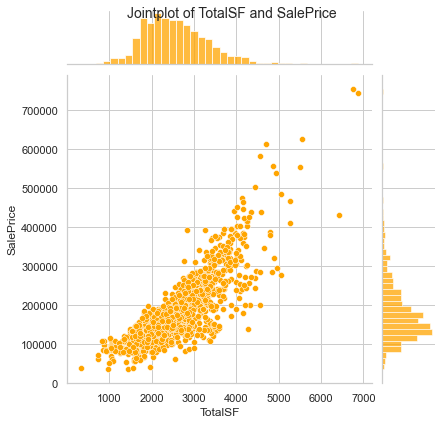

In [132]:
plot = sns.jointplot(x="TotalSF", y="SalePrice", data=train_df, color='orange')
plot.fig.suptitle("Jointplot of TotalSF and SalePrice", fontsize=14)
plt.show()

In [135]:
corr_matrix = train_df.corr()
cor_target = abs(corr_matrix['SalePrice'])

relevant_features = cor_target[cor_target > 0.5]
relevant_features_sorted = relevant_features.sort_values(ascending=False)

print("Updated Descending List of Highly Correlated Features:")
print(relevant_features_sorted)

Updated Descending List of Highly Correlated Features:
SalePrice       1.000000
TotalSF         0.832984
OverallQual     0.795707
GrLivArea       0.734842
TotalBsmtSF     0.652164
GarageCars      0.641033
1stFlrSF        0.631667
GarageArea      0.629268
FullBath        0.561982
TotRmsAbvGrd    0.537503
YearBuilt       0.523935
GarageYrBlt     0.509221
YearRemodAdd    0.507454
Name: SalePrice, dtype: float64


# 5. Using the dependent variable, perform both min-max and standard scaling in Python.

### Min-Max Scaling

In [157]:
mmscaler = MinMaxScaler()

train_df['SalePrice_mmscaled'] = mmscaler.fit_transform(train_df[['SalePrice']])

print(train_df['SalePrice_mmscaled'].describe())

count    1457.000000
mean        0.202737
std         0.110410
min         0.000000
25%         0.131926
50%         0.177892
75%         0.248715
max         1.000000
Name: SalePrice_mmscaled, dtype: float64


The correct transformation has been successfully performed, as evidenced by the scaled 'SalePrice' variable ('SalePrice_scaled') ranging from 0 (minimum) to 1 (maximum).

<AxesSubplot:xlabel='SalePrice_mmscaled', ylabel='Count'>

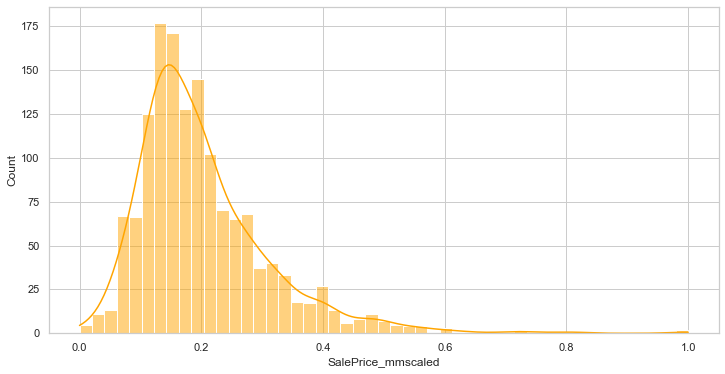

In [158]:
plt.figure(figsize = (12,6))
sns.histplot(data=train_df, kde=True, x='SalePrice_mmscaled', color="orange")

Examining Min-Max scaling on the two most correlated variables: 'OverallQual' and 'TotalSF'

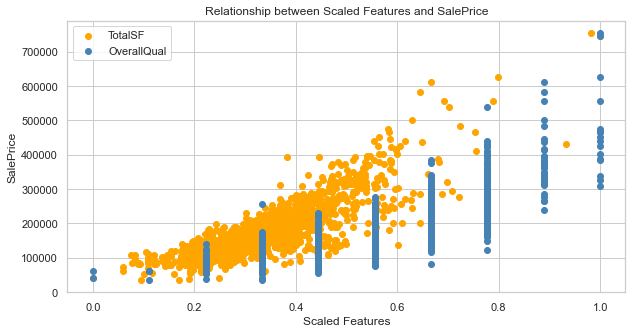

In [166]:
features = ['TotalSF', 'OverallQual']
features_df = train_df[features]

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df)

sale_price = train_df["SalePrice"]
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(x=minmax_features[:, 0], y=sale_price, label='TotalSF', color='orange')
ax.scatter(x=minmax_features[:, 1], y=sale_price, label='OverallQual', color='steelblue')

ax.set_xlabel('Scaled Features')
ax.set_ylabel('SalePrice')
ax.legend()

ax.set_title('Relationship between Scaled Features and SalePrice')
plt.show()

Test apply logarithmic transformation for a better fit

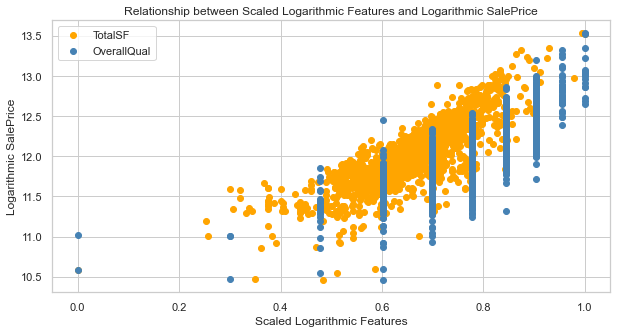

In [168]:
features = ['TotalSF', 'OverallQual']
features_df = train_df[features]

features_df_log = np.log(features_df)
sale_price_log = np.log(train_df["SalePrice"])

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df_log)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:, 0], y=sale_price_log, label='TotalSF', color='orange')
ax.scatter(x=minmax_features[:, 1], y=sale_price_log, label='OverallQual', color='steelblue')

ax.set_xlabel('Scaled Logarithmic Features')
ax.set_ylabel('Logarithmic SalePrice')
ax.legend()

ax.set_title('Relationship between Scaled Logarithmic Features and Logarithmic SalePrice')
plt.show()

There is visual benefit to logarithmic transformations when min-max scaling. The distributions are much more in line with each other and comparable after transformation.

### Standard Scaling

In [159]:
stscaler = StandardScaler()

train_df['SalePrice_stscaled'] = stscaler.fit_transform(train_df[['SalePrice']])
print(train_df['SalePrice_stscaled'].describe())

count    1.457000e+03
mean    -1.493886e-16
std      1.000343e+00
min     -1.836851e+00
25%     -6.415662e-01
50%     -2.251037e-01
75%      4.165757e-01
max      7.223410e+00
Name: SalePrice_stscaled, dtype: float64


With the mean of the newly standardized 'SalePrice' variable approximately equal to 0 and its standard deviation approximately equal to 1, we can be confident that the transformation was executed correctly and successfully.

<AxesSubplot:xlabel='SalePrice_stscaled', ylabel='Count'>

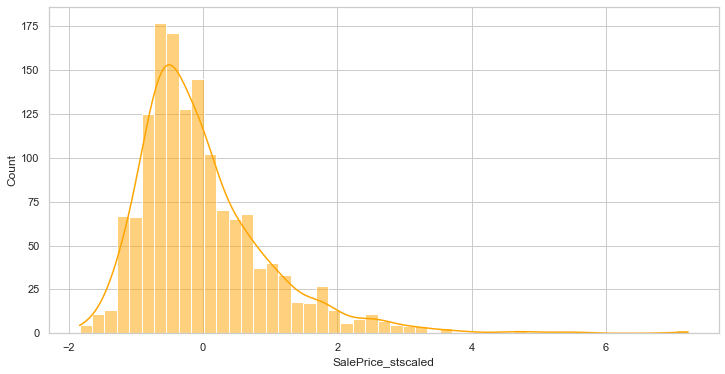

In [160]:
plt.figure(figsize = (12,6))
sns.histplot(data=train_df, kde=True, x='SalePrice_stscaled', color="orange")

Examining Standard scaling on the two most correlated variables: 'OverallQual' and 'TotalSF'

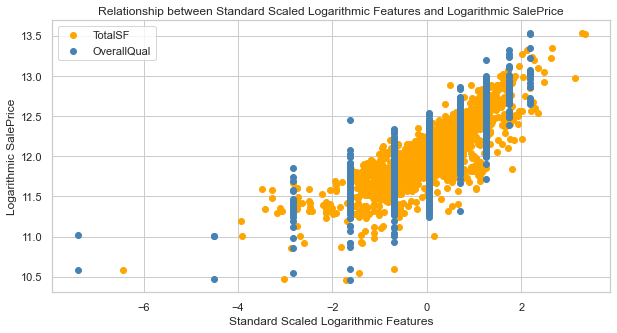

In [165]:
features = ['TotalSF', 'OverallQual']
features_df = train_df[features]

features_df_log = np.log(features_df)
sale_price_log = np.log(train_df["SalePrice"])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df_log)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=scaled_features[:, 0], y=sale_price_log, label='TotalSF', color='orange')
ax.scatter(x=scaled_features[:, 1], y=sale_price_log, label='OverallQual', color='steelblue')

ax.set_xlabel('Standard Scaled Logarithmic Features')
ax.set_ylabel('Logarithmic SalePrice')
ax.legend()

ax.set_title('Relationship between Standard Scaled Logarithmic Features and Logarithmic SalePrice')
plt.show()


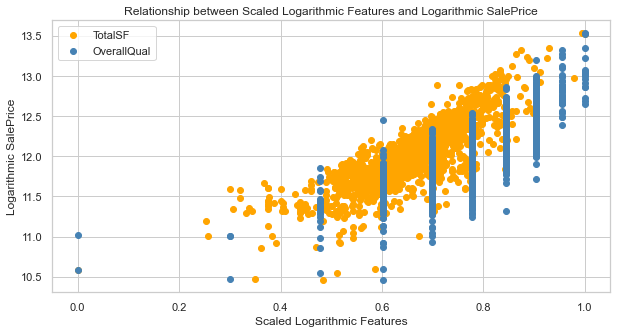

In [170]:
features = ['TotalSF', 'OverallQual']
features_df = train_df[features]

features_df_log = np.log(features_df)
sale_price_log = np.log(train_df["SalePrice"])

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df_log)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:, 0], y=sale_price_log, label='TotalSF', color='orange')
ax.scatter(x=minmax_features[:, 1], y=sale_price_log, label='OverallQual', color='steelblue')

ax.set_xlabel('Scaled Logarithmic Features')
ax.set_ylabel('Logarithmic SalePrice')
ax.legend()

ax.set_title('Relationship between Scaled Logarithmic Features and Logarithmic SalePrice')
plt.show()


In the standard scaling, there appears better alignment between variables in the non-logarithmic transpormation plot than after logarithmic transformation. There is less of an effect on standard scaling than there is on min-max scaling.